## Taxis trip record analysis

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Using the method from the seaborn library load_dataset, we will load the first dataset for analysis. 
The dataset contains taxi rides in New York City in 2019. A detailed description is available on the [website](https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page).  

What columns the dataset contains:  
- `pickup` - start time of the trip  
- `dropoff` - time of the trip end 
- `passengers` - the number of passengers in the trip
- `distance` - distance of the trip 
- `fare` - basic fare for the trip
- `tip` - the amount of the tip
- `tolls` - tolls for toll roads (also paid by the passenger)  
- `total` - total fare for the trip 
- `color` - the colour of the car that made the trip  
- `payment` - payment method
- `pickup_zone` - zone where the trip started
- `dropoff_zone` - zone where the trip ended 
- `pickup_borough` -the area where the trip started
- `dropoff_borough` - the area where the trip ended

In [2]:
df_taxi = sns.load_dataset('taxis')

In [3]:
display(df_taxi.head(3),df_taxi.dtypes, df_taxi.shape)

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan


pickup             datetime64[ns]
dropoff            datetime64[ns]
passengers                  int64
distance                  float64
fare                      float64
tip                       float64
tolls                     float64
total                     float64
color                      object
payment                    object
pickup_zone                object
dropoff_zone               object
pickup_borough             object
dropoff_borough            object
dtype: object

(6433, 14)

In [4]:
df_taxi.isna().sum()

pickup              0
dropoff             0
passengers          0
distance            0
fare                0
tip                 0
tolls               0
total               0
color               0
payment            44
pickup_zone        26
dropoff_zone       45
pickup_borough     26
dropoff_borough    45
dtype: int64

It might be noticed that some data is missing? Why? The answer to this question will give you an idea of whether such data can be deleted or whether it needs to be filled in somehow. Let's display the rows where the column with the most missing values (or one of the columns with the maximum number of missing values) has missing values.

In [5]:
df_taxi[df_taxi.dropoff_borough.isna()]

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
42,2019-03-30 23:59:14,2019-03-30 23:59:17,1,0.00,80.0,20.08,0.00,100.38,yellow,credit card,NaN,NaN,NaN,NaN
622,2019-03-12 19:52:36,2019-03-12 19:52:55,3,0.00,120.0,33.20,12.50,166.00,yellow,credit card,NaN,NaN,NaN,NaN
711,2019-03-21 17:39:50,2019-03-21 18:12:54,2,1.74,17.0,4.26,0.00,25.56,yellow,credit card,Midtown East,NaN,Manhattan,NaN
739,2019-03-14 00:09:17,2019-03-14 00:09:21,1,0.03,2.5,0.00,0.00,3.80,yellow,cash,Upper East Side South,NaN,Manhattan,NaN
970,2019-03-29 00:02:00,2019-03-29 00:02:05,2,0.00,45.0,5.00,0.00,50.30,yellow,credit card,NaN,NaN,NaN,NaN
1108,2019-03-10 09:33:13,2019-03-10 09:52:04,1,13.40,52.0,11.70,5.76,70.26,yellow,credit card,NaN,NaN,NaN,NaN
1112,2019-03-12 19:09:23,2019-03-12 19:20:46,1,0.90,8.5,1.92,0.00,14.72,yellow,credit card,Times Sq/Theatre District,NaN,Manhattan,NaN
1230,2019-03-29 07:52:46,2019-03-29 08:02:40,1,0.90,5.5,1.76,0.00,10.56,yellow,credit card,Yorkville East,NaN,Manhattan,NaN
1690,2019-03-22 06:24:14,2019-03-22 06:24:14,1,0.00,72.0,0.00,0.00,72.00,yellow,NaN,East New York,NaN,Brooklyn,NaN
1787,2019-03-28 06:58:57,2019-03-28 07:18:10,1,6.32,20.5,4.26,0.00,25.56,yellow,credit card,Manhattan Valley,NaN,Manhattan,NaN


In these rows, there are missing data in several columns and the reason for this phenomenon may be that the customer canceled the trip. Looking at the distance==0 column, and taking into account the start and end times of the trip (the difference between which is a few seconds or minutes), I am still closer to this version. 
And the lines with distance==0 and total!=0 can exist because the payment for the trip was made by prepaid card or these amounts in total are the amount of the minimum order, and are not refunded if there is a canceled trip.

In [6]:
# filling null values
df_taxi_clean = df_taxi.fillna('NA')

In [7]:
df_taxi_clean.isna().sum()

pickup             0
dropoff            0
passengers         0
distance           0
fare               0
tip                0
tolls              0
total              0
color              0
payment            0
pickup_zone        0
dropoff_zone       0
pickup_borough     0
dropoff_borough    0
dtype: int64

In [8]:
# our pickup column now contains data in the date-time format. I suggest removing the time and making analytics by day
df_taxi_clean['pickup_day'] = df_taxi_clean.pickup.dt.floor('d')

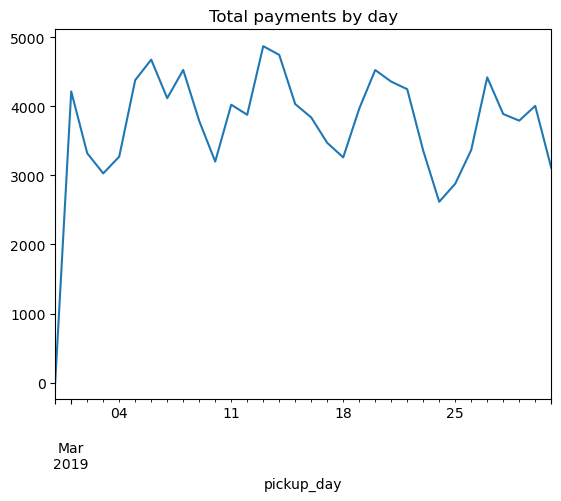

In [9]:
# group the data by pickup_day and display a graph of total payments by day
df_taxi_clean.groupby('pickup_day')['total'].sum().plot()
plt.title('Total payments by day');

In [10]:
# at the beginning of the graph, you can see that there is a value that is not typical for total payments by day.
df_taxi_clean.groupby('pickup_day')['total'].count()

pickup_day
2019-02-28      1
2019-03-01    241
2019-03-02    198
2019-03-03    169
2019-03-04    171
2019-03-05    228
2019-03-06    257
2019-03-07    218
2019-03-08    235
2019-03-09    204
2019-03-10    185
2019-03-11    209
2019-03-12    218
2019-03-13    244
2019-03-14    260
2019-03-15    201
2019-03-16    220
2019-03-17    178
2019-03-18    173
2019-03-19    201
2019-03-20    233
2019-03-21    221
2019-03-22    229
2019-03-23    209
2019-03-24    149
2019-03-25    155
2019-03-26    178
2019-03-27    232
2019-03-28    205
2019-03-29    209
2019-03-30    215
2019-03-31    187
Name: total, dtype: int64

In [11]:
# so we delete it
df_taxi_clean = df_taxi_clean[df_taxi_clean.pickup_day!='2019-02-28']

In [12]:
df_taxi.shape, df_taxi_clean.shape 

((6433, 14), (6432, 15))

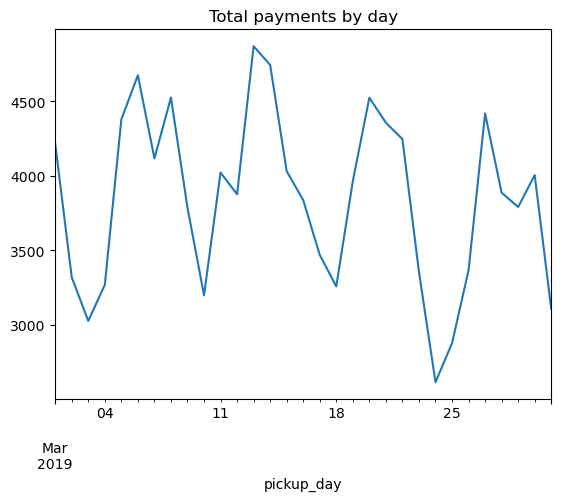

In [13]:
df_taxi_clean.groupby('pickup_day')['total'].sum().plot()
plt.title('Total payments by day');

In [14]:
# let's look at the dynamics of total payments by borough
borough_pivot = df_taxi_clean.pivot_table(index ='pickup_day', columns ='pickup_borough', values ='total', aggfunc = 'sum')

In [15]:
borough_pivot.drop(columns=['NA'], inplace=True)

In [16]:
borough_pivot.head()

pickup_borough,Bronx,Brooklyn,Manhattan,Queens
pickup_day,,,,
2019-03-01,123.42,353.05,3169.47,553.29
2019-03-02,NaN,146.56,2716.33,456.13
2019-03-03,80.75,407.06,2100.23,428.73
2019-03-04,92.00,188.73,2026.17,962.18
2019-03-05,98.16,558.40,2981.26,739.56


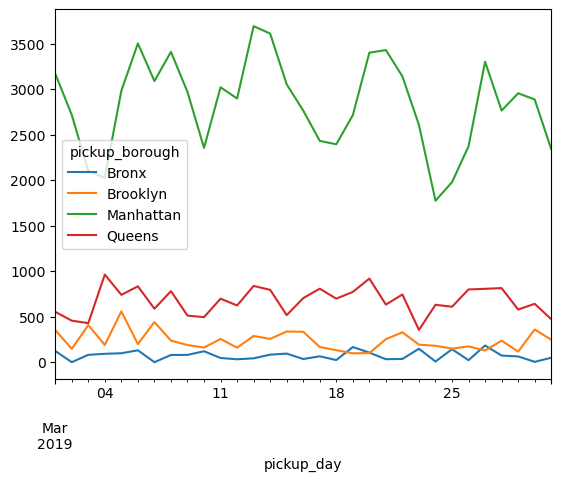

In [17]:
borough_pivot.fillna(0).plot();

Manhattan has the highest payments for taxi rides, therefore it'll be a good idea to place more taxi cars in this district.

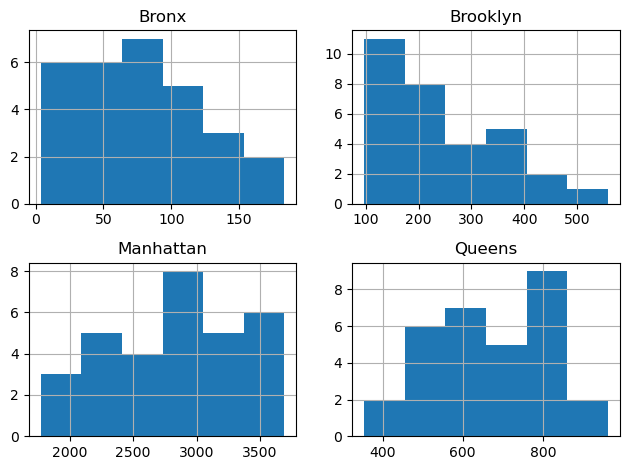

In [18]:
# Let's create histograms of the amount of daily payments for trips in each of the boroughs. 
borough_pivot.hist(bins=6);
plt.tight_layout()

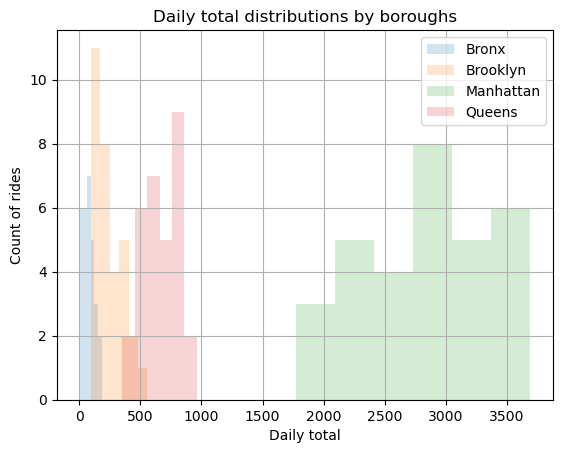

In [19]:
# Also we can display all 4 histograms on one figure for a more convenient comparison
for c in borough_pivot.columns:
    borough_pivot[c].hist(alpha=0.2, bins=6, label=c)
plt.title('Daily total distributions by boroughs')
plt.xlabel('Daily total')
plt.ylabel('Count of rides')
plt.legend()
plt.show();

And here is an example of how something similar could be generated using the seaborn functionality. For me, the default visualisation is not easy to understand.

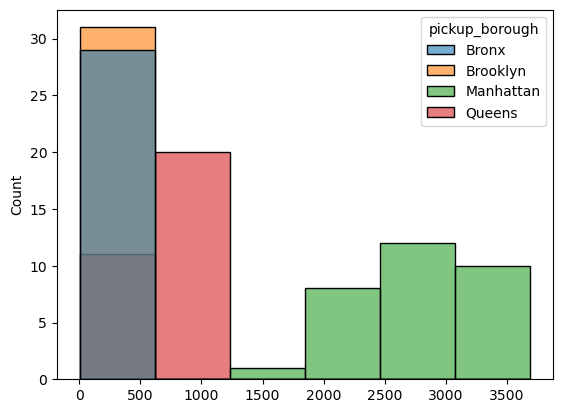

In [20]:
sns.histplot(data=borough_pivot, bins=6, alpha=0.6);

In [21]:
# let's display histograms of the amount of monthly payments by car color
df_taxi_clean.color.nunique()

2

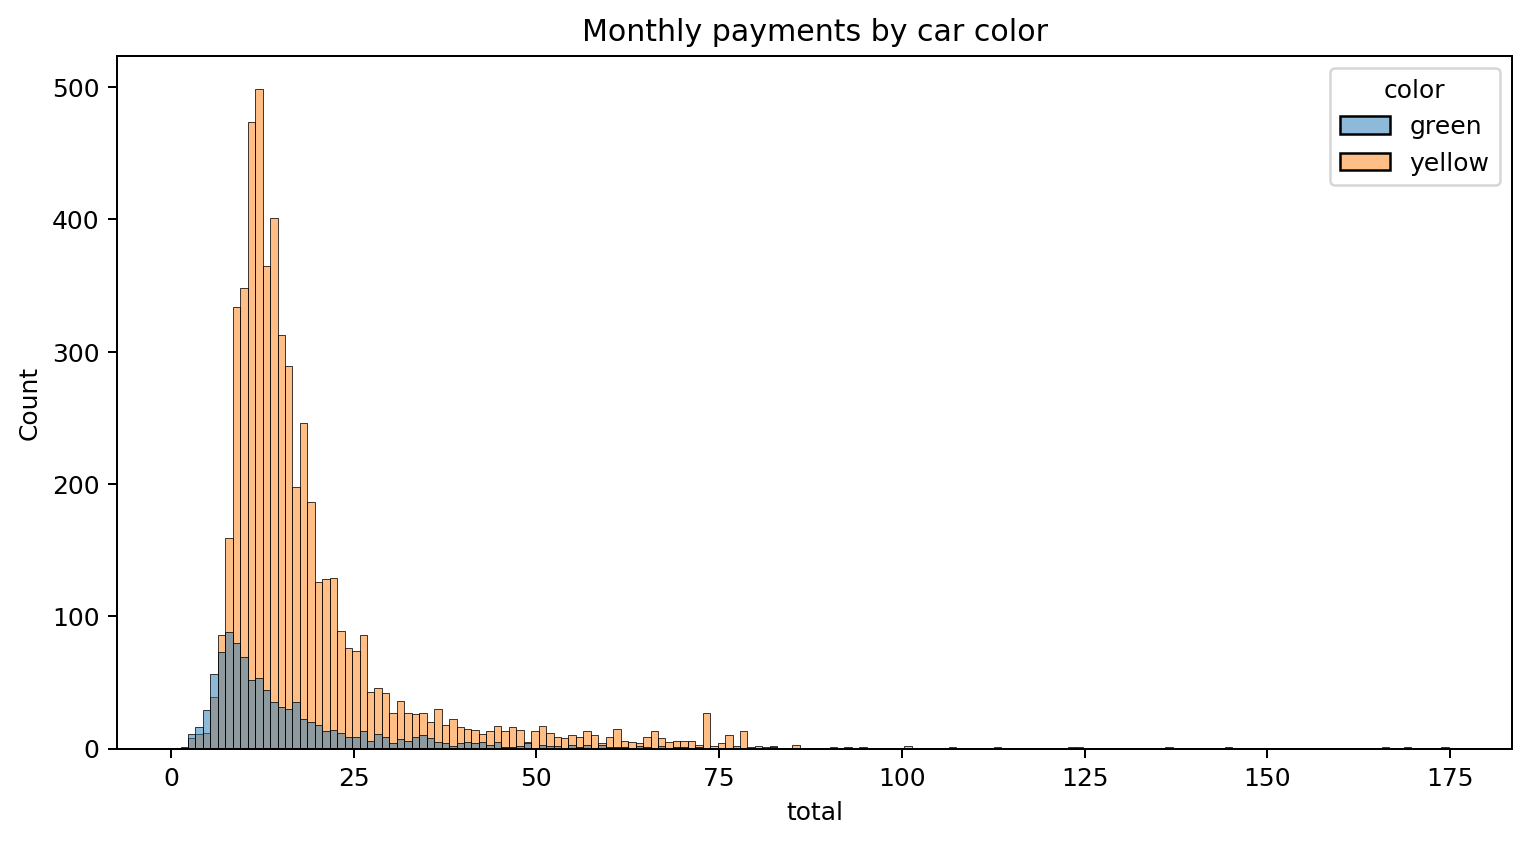

In [22]:
plt.figure(figsize=(10,5), dpi=180)
sns.histplot(x='total', hue='color', data=df_taxi_clean.sort_values('color'))
plt.title('Monthly payments by car color');

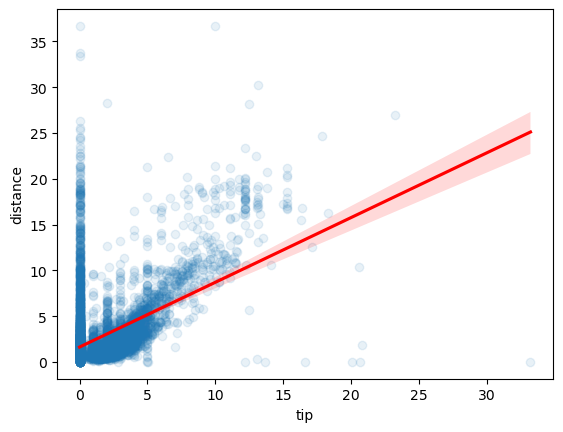

In [23]:
# Is there correlation between the distance of the trip and the size of the tip?
sns.regplot(x='tip', y='distance', data=df_taxi_clean, line_kws={'color':'r'}, scatter_kws={'alpha':0.1} );

Correlation is not really high and a straight line of points parallel to the axis along which the trip distance is located may indicate that there are a certain number of trips for which the tip amount is 0, regardless of their distance. There are several options for why this happens with tips. For example, there is a certain period of time or a certain category of people who use taxi services without leaving a tip. Perhaps the transportation is carried out by drivers whose cars require better technical condition and cleanliness, so they receive smaller tips or do not receive them at all.

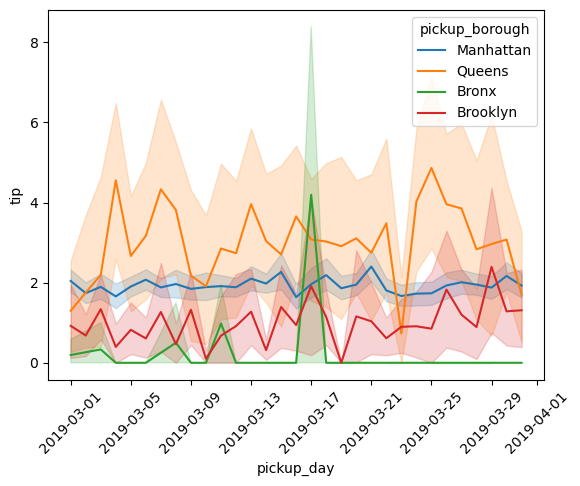

In [24]:
# Let's build the daily distribution of tips by borough
sns.lineplot(x='pickup_day', y='tip', hue='pickup_borough', data=df_taxi_clean[df_taxi_clean.pickup_borough!='NA'])
plt.xticks(rotation=45);

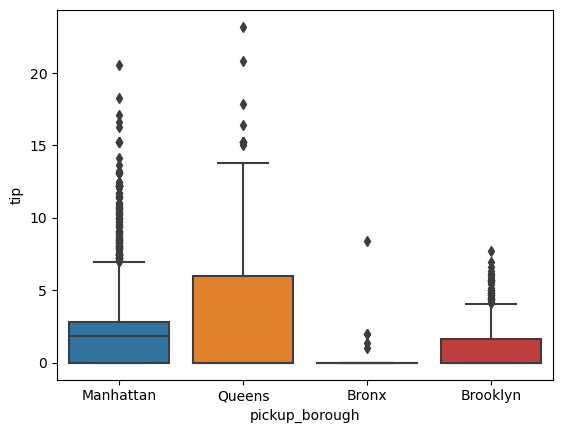

In [25]:
sns.boxplot(x='pickup_borough', y='tip', data=df_taxi_clean[df_taxi_clean.pickup_borough!='NA']);

- Lowest average tip for trips from Bronx.
- Highest average tip for trips from Queens.
- The tip size is the stablest in Manhattan.

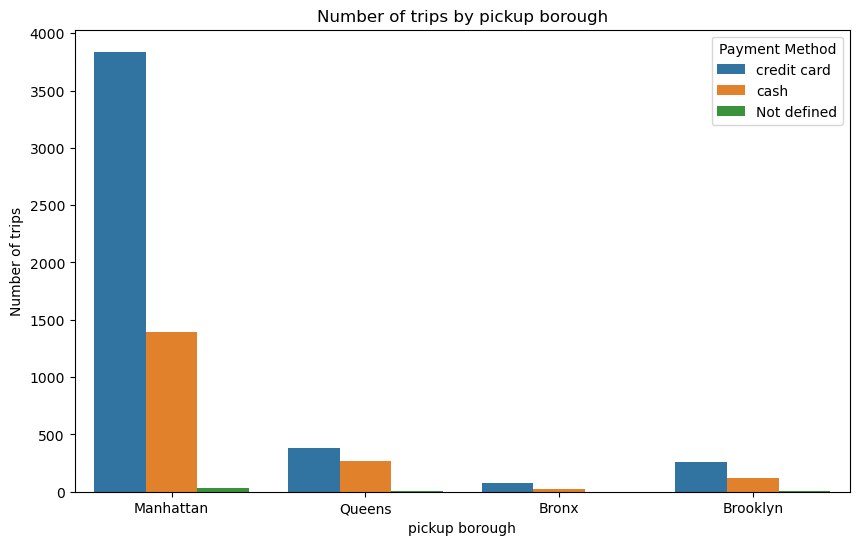

In [26]:
# What is the most common payment method by region?
df_taxi_clean['payment'] = df_taxi_clean['payment'].replace('NA', 'Not defined')
plt.figure(figsize=(10, 6))
sns.countplot(data=df_taxi_clean[df_taxi_clean.pickup_borough != 'NA'], x='pickup_borough', hue='payment')
plt.xlabel('pickup borough')
plt.ylabel('Number of trips')
plt.title('Number of trips by pickup borough')
plt.legend(title='Payment Method')
plt.show()

Analysing payment data helps to understand which payment methods are most popular among passengers. This can be useful when establishing partnerships with payment systems or providing convenient payment methods for customers.Card payment is the most common payment method in all districts, so there is a case for cooperation with different payment systems. Regarding the 'Not defined' data, I decided to leave it on the graph, as it visually allows us to understand how many trips do not have payment information and whether this can significantly affect the result of the payment method comparison. As you can see from our graph, this data does not have a significant impact.

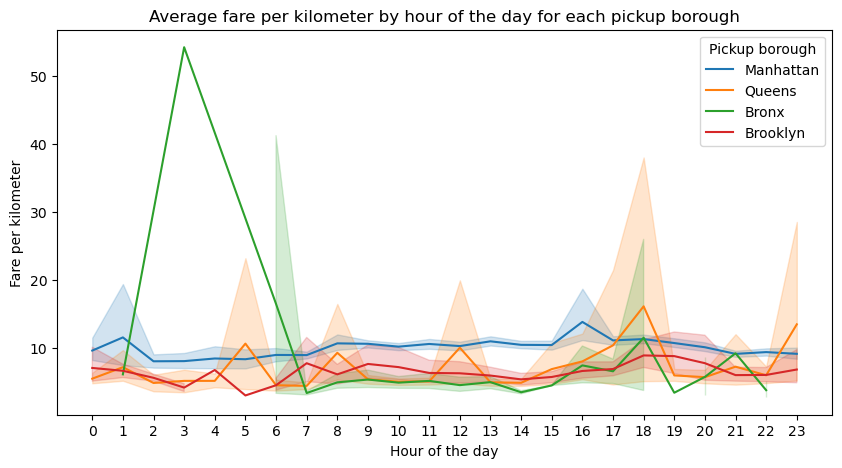

In [27]:
# Let's see how the cost of a trip per 1 km changes during the day
df_taxi_clean['km_rate'] = df_taxi_clean['total']/df_taxi_clean['distance']
df_taxi_clean["pickup_hour"]=df_taxi_clean["pickup"].dt.hour
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_taxi_clean[df_taxi_clean.pickup_borough != 'NA'], x="pickup_hour", y="km_rate", hue="pickup_borough")
plt.xlabel('Hour of the day')
plt.xticks(range(24))
plt.ylabel('Fare per kilometer')
plt.title('Average fare per kilometer by hour of the day for each pickup borough')
plt.legend(title='Pickup borough')
plt.show()

   Due to the graph, we can track the dynamics of changes in the cost of a taxi ride throughout the day. Such analysis is valuable for the company because it affects the location of more or less cars in different districts, and also demonstrates what time of day is economically profitable to operate (you should also take into account the level of traffic congestion and how much it affects the cost of transportation). As you can see from the graph, the cost of trips is higher during the peak hours (16-19 hours). The spike in Bronx may indicate an outlier, which is likely due to the small amount of travel data available for this time of day.

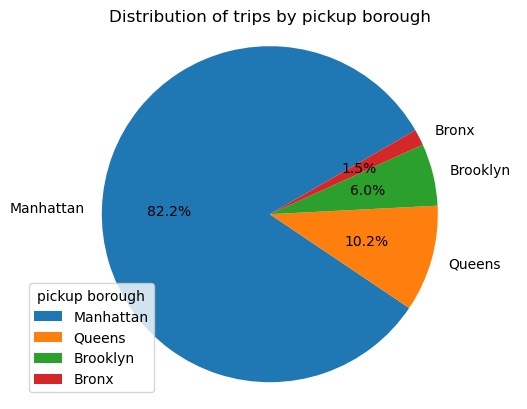

In [28]:
# In which area are taxis most often ordered?
trip_counts = df_taxi_clean[df_taxi_clean['pickup_borough']!='NA']['pickup_borough'].value_counts()
most_common_borough = trip_counts.idxmax()
plt.pie(trip_counts.values, labels=trip_counts.index, autopct='%1.1f%%', startangle=30)
plt.axis('equal')
plt.title('Distribution of trips by pickup borough')
plt.legend(title='pickup borough')
plt.show();

Analysing the resulting pie chart, I can conclude that taxis are most often ordered in the Manhattan area. This means that this area is in the highest demand among others. This factor has a significant impact on business decisions, as you need to provide a sufficient number of cars to make trips and minimise waiting time for passengers. In general, knowledge of popular taxi locations can be used to develop marketing strategies and advertising campaigns. For example, a company can target its advertising to this area, provide special offers or discounts to attract more customers.